<a href="https://colab.research.google.com/github/youssefsalah222/datascienceproject/blob/main/dogs_%26_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API of kaggle
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'image resized'     sample_data   test1.zip		 train.zip


In [ ]:
# extract the zipped data
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset , 'r') as zip:
  zip.extractall()
  print('extracted done')

extracted done


In [ ]:
# extract the zipped data
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset , 'r') as zip:
  zip.extractall()
  print('extracted done')

extracted done


In [ ]:
import os
# num of files 
path , dirs , files = next(os.walk('/content/train'))
file_count = len(files)
print("Num of images: " , file_count)

Num of images:  25000


In [ ]:
# name of images
file_names = os.listdir('/content/train/')
print("Names: " , file_names)

Names:  ['cat.5581.jpg', 'cat.8006.jpg', 'dog.2946.jpg', 'dog.1689.jpg', 'dog.9509.jpg', 'dog.10618.jpg', 'dog.6173.jpg', 'cat.9403.jpg', 'cat.6237.jpg', 'dog.935.jpg', 'dog.1454.jpg', 'cat.6852.jpg', 'dog.12295.jpg', 'cat.7229.jpg', 'dog.8798.jpg', 'cat.9885.jpg', 'dog.6270.jpg', 'dog.6566.jpg', 'cat.7736.jpg', 'cat.4375.jpg', 'cat.711.jpg', 'dog.698.jpg', 'dog.2054.jpg', 'cat.7704.jpg', 'cat.12284.jpg', 'cat.8136.jpg', 'dog.5906.jpg', 'cat.7211.jpg', 'dog.7875.jpg', 'dog.10780.jpg', 'dog.4861.jpg', 'cat.8894.jpg', 'dog.7614.jpg', 'cat.2119.jpg', 'cat.8766.jpg', 'dog.2041.jpg', 'dog.11618.jpg', 'cat.1287.jpg', 'cat.12116.jpg', 'cat.1476.jpg', 'dog.608.jpg', 'dog.4654.jpg', 'cat.5535.jpg', 'dog.4951.jpg', 'cat.11789.jpg', 'cat.1039.jpg', 'cat.770.jpg', 'dog.7424.jpg', 'cat.4187.jpg', 'dog.219.jpg', 'dog.7011.jpg', 'dog.10775.jpg', 'dog.8747.jpg', 'cat.948.jpg', 'dog.10914.jpg', 'cat.7153.jpg', 'cat.10390.jpg', 'dog.9232.jpg', 'cat.858.jpg', 'dog.690.jpg', 'cat.4478.jpg', 'dog.10427.jpg

In [ ]:
# Imports
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

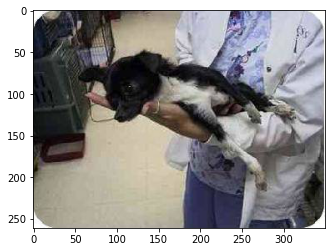

In [ ]:
# display dog images
img = mpimg.imread('/content/train/dog.8640.jpg')
imgplt = plt.imshow(img)
plt.show()

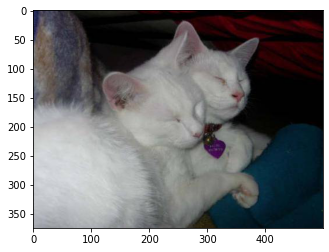

In [ ]:
# display cat images
img = mpimg.imread('/content/train/cat.3504.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
# Resize images
file_names = os.listdir('/content/train/')
for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
cat
dog
dog
dog


In [ ]:
file_names = os.listdir('/content/train/')
dog_count = 0
cat_count = 0
for img_file in (file_names):
  name = img_file[0:3]
  if name == 'dog':
    dog_count +=1
  else:
    cat_count +=1
print("DOGS: " , dog_count)
print("CATS: " , cat_count)


DOGS:  12500
CATS:  12500


In [ ]:
#creating a directory for resized images 
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'
for i in range (4000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename
  img = Image.open(img_path)
  img = img.resize((224 , 224))
  img  = img.convert('RGB')
  newImgpath = resized_folder+filename
  img.save(newImgpath)

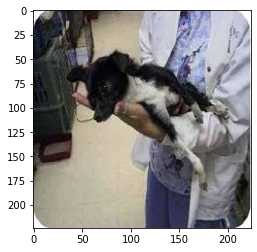

In [ ]:
# display resized dog images
img = mpimg.imread('/content/image resized/dog.8640.jpg')
imgplt = plt.imshow(img)
plt.show()

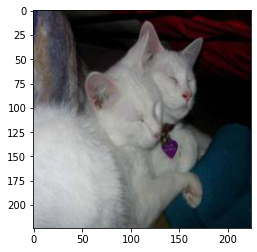

In [ ]:
# display cat images
img = mpimg.imread('/content/image resized/cat.3504.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
# creating labels for resizing images cat -> 0 , dog -> 1
filenames = os.listdir('/content/image resized/')
labels = []
for i in range(4000):
  file_name = filenames[i]
  label = file_name[0:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.5581.jpg', 'cat.8006.jpg', 'dog.2946.jpg', 'dog.1689.jpg', 'dog.9509.jpg']
4000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 1, 1]
4000


In [ ]:
# counting images out of 2000 images
values , counts  = np.unique(labels , return_counts= True) 
print(values)
print(counts)

[0 1]
[2029 1971]


In [ ]:
import cv2
import glob

In [ ]:
# convert resized images to numpy array
image_directory = '/content/image resized/'
image_extension = ['png' , 'jpg']
files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])


In [ ]:
print(dog_cat_images)

[[[[ 66 121 172]
   [ 64 119 170]
   [ 70 123 174]
   ...
   [ 23  13 119]
   [ 22  12 118]
   [ 23  13 119]]

  [[ 73 128 179]
   [ 63 118 169]
   [ 72 125 176]
   ...
   [ 22  12 118]
   [ 22  12 118]
   [ 25  15 121]]

  [[ 78 133 184]
   [ 61 116 167]
   [ 73 126 177]
   ...
   [ 20  10 116]
   [ 23  11 117]
   [ 29  17 123]]

  ...

  [[  2  50 155]
   [  3  51 156]
   [  4  53 155]
   ...
   [ 69 145 193]
   [ 69 143 191]
   [ 68 140 187]]

  [[  5  56 160]
   [  5  56 160]
   [  7  59 160]
   ...
   [ 72 149 195]
   [ 73 148 194]
   [ 71 146 190]]

  [[ 13  64 168]
   [ 14  65 169]
   [ 15  67 168]
   ...
   [ 76 153 199]
   [ 77 152 196]
   [ 76 151 195]]]


 [[[ 90 101 105]
   [ 90 101 105]
   [ 90 101 105]
   ...
   [116 122 127]
   [116 122 127]
   [116 122 127]]

  [[ 90 101 105]
   [ 90 101 105]
   [ 90 101 105]
   ...
   [116 122 127]
   [116 122 127]
   [116 122 127]]

  [[ 90 101 105]
   [ 90 101 105]
   [ 90 101 105]
   ...
   [116 122 127]
   [116 122 127]
   [116 122

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(4000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
# Train Test split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=2) 

In [ ]:
# Split tset data (test , validate)
X_test , X_val , Y_test , Y_val = train_test_split(X_test , Y_test , test_size=0.3 , random_state=2) 

In [ ]:
print(X.shape , X_train.shape , X_test.shape , X_val.shape)

(4000, 224, 224, 3) (3200, 224, 224, 3) (560, 224, 224, 3) (240, 224, 224, 3)


In [ ]:
# scaling the data (normalize)
X_train_scaled = X_train/255
X_test_scaled = X_test/255
X_val_scaled = X_val/255

In [ ]:
print(X_train_scaled)

[[[[0.23529412 0.21176471 0.21568627]
   [0.21960784 0.19607843 0.2       ]
   [0.21568627 0.19215686 0.19607843]
   ...
   [0.05490196 0.0627451  0.06666667]
   [0.0745098  0.08235294 0.08627451]
   [0.11372549 0.12156863 0.1254902 ]]

  [[0.23921569 0.21568627 0.21960784]
   [0.24313725 0.21960784 0.22352941]
   [0.23921569 0.21568627 0.21960784]
   ...
   [0.09411765 0.10196078 0.10588235]
   [0.10980392 0.11764706 0.12156863]
   [0.1372549  0.14509804 0.14901961]]

  [[0.24313725 0.21960784 0.22352941]
   [0.27058824 0.24705882 0.25098039]
   [0.27058824 0.24705882 0.25098039]
   ...
   [0.11764706 0.1254902  0.12941176]
   [0.12156863 0.12941176 0.13333333]
   [0.1372549  0.14509804 0.14901961]]

  ...

  [[0.18431373 0.19607843 0.21176471]
   [0.21960784 0.23137255 0.24705882]
   [0.22745098 0.23921569 0.25490196]
   ...
   [0.22745098 0.23921569 0.25490196]
   [0.21568627 0.22745098 0.24313725]
   [0.16078431 0.17254902 0.18823529]]

  [[0.19215686 0.20392157 0.21960784]
   [0.2

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
#import mobile net model with input shape same for our photos and trainable = false not trained on the last layer
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [ ]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)   # output layer 
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc'],
)

In [ ]:
history = model.fit(X_train_scaled , Y_train , validation_data=(X_val_scaled , Y_val),epochs=5)

Epoch 1/5
100/100 [==============================] - 102s 1s/step - loss: 0.1330 - acc: 0.9497 - val_loss: 0.0541 - val_acc: 0.9875
Epoch 2/5
100/100 [==============================] - 95s 952ms/step - loss: 0.0575 - acc: 0.9834 - val_loss: 0.0401 - val_acc: 0.9833
Epoch 3/5
100/100 [==============================] - 97s 967ms/step - loss: 0.0480 - acc: 0.9841 - val_loss: 0.0334 - val_acc: 0.9875
Epoch 4/5
100/100 [==============================] - 95s 951ms/step - loss: 0.0359 - acc: 0.9887 - val_loss: 0.0337 - val_acc: 0.9875
Epoch 5/5
100/100 [==============================] - 96s 962ms/step - loss: 0.0312 - acc: 0.9894 - val_loss: 0.0363 - val_acc: 0.9833


In [ ]:
score , acc = model.evaluate(X_test_scaled , Y_test)
print('Test Loss = ' , score)
print('Test Accuracy = ' , acc)

18/18 [==============================] - 18s 948ms/step - loss: 0.0588 - acc: 0.9804
Test Loss =  0.05877823010087013
Test Accuracy =  0.9803571701049805


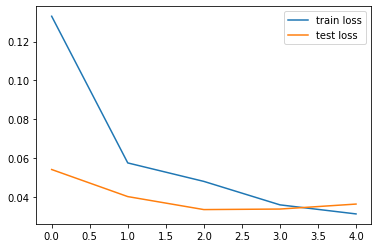

In [ ]:
plt.plot(history.history['loss'] , label='train loss')
plt.plot(history.history['val_loss'] , label = 'test loss')
plt.legend()
plt.show()

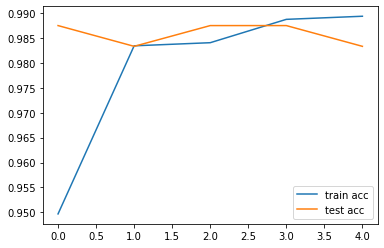

In [ ]:
plt.plot(history.history['acc'] , label='train acc')
plt.plot(history.history['val_acc'] , label = 'test acc')
plt.legend()
plt.show()

In [ ]:
y_dash = model.predict(X_test_scaled)

18/18 [==============================] - 18s 972ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
Cm=confusion_matrix(Y_test,np.argmax(y_dash, axis=1))
print('Confusion Matrix ')
print()
print (pd.DataFrame(Cm, columns=['cats','dogs'],index=['cats','dogs']))

Confusion Matrix 

      cats  dogs
cats   264     6
dogs     5   285
